In [2]:
import pickle
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

import nltk
nltk.download('stopwords');
import time
from collections import defaultdict
from array import array
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import collections
from numpy import linalg as la

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xoelr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading data needed

In [3]:
X_tsne =pickle.load( open( "X_tsne.p", "rb" ) )
len(X_tsne)

110652

# Number of clusters selection

For n_clusters = 5 The average silhouette_score is : 0.319444
For n_clusters = 6 The average silhouette_score is : 0.34555492
For n_clusters = 7 The average silhouette_score is : 0.3430704
For n_clusters = 8 The average silhouette_score is : 0.33291453
For n_clusters = 9 The average silhouette_score is : 0.3369756
For n_clusters = 10 The average silhouette_score is : 0.3365514
For n_clusters = 11 The average silhouette_score is : 0.33703893
For n_clusters = 12 The average silhouette_score is : 0.3392827
For n_clusters = 13 The average silhouette_score is : 0.33641395
For n_clusters = 14 The average silhouette_score is : 0.3367268


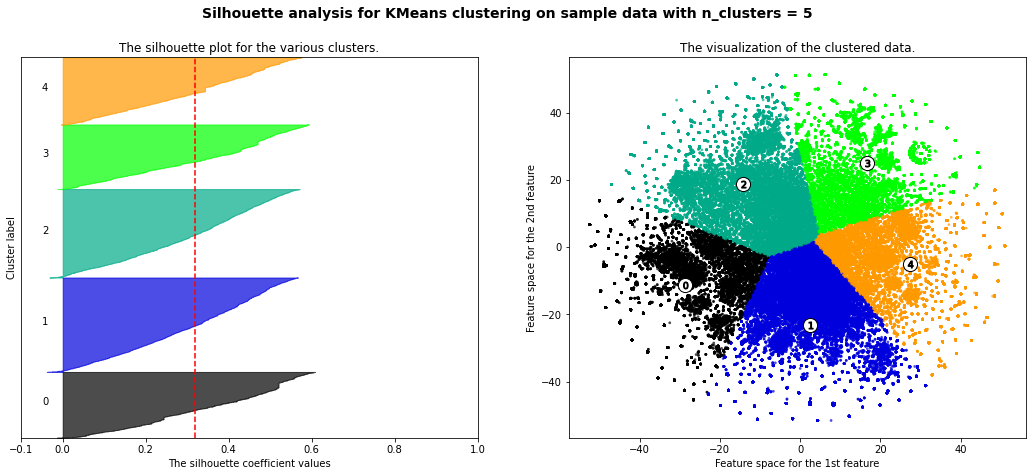

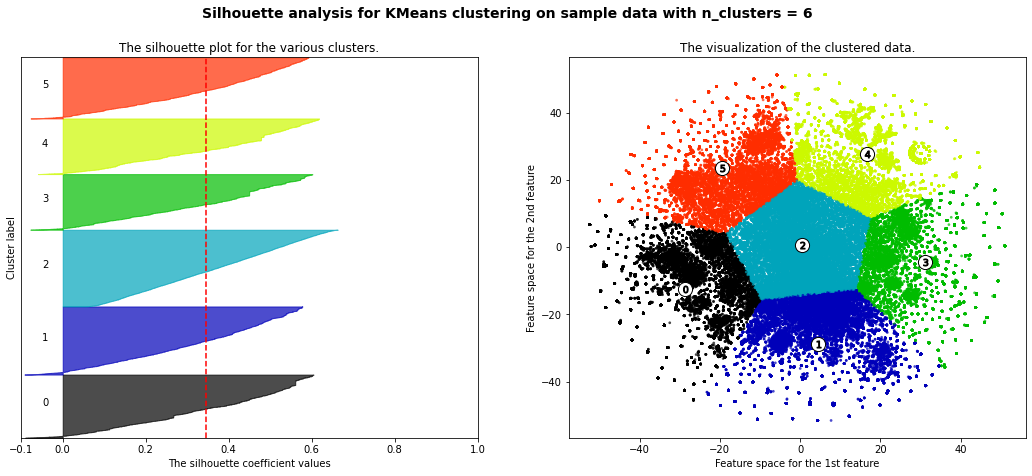

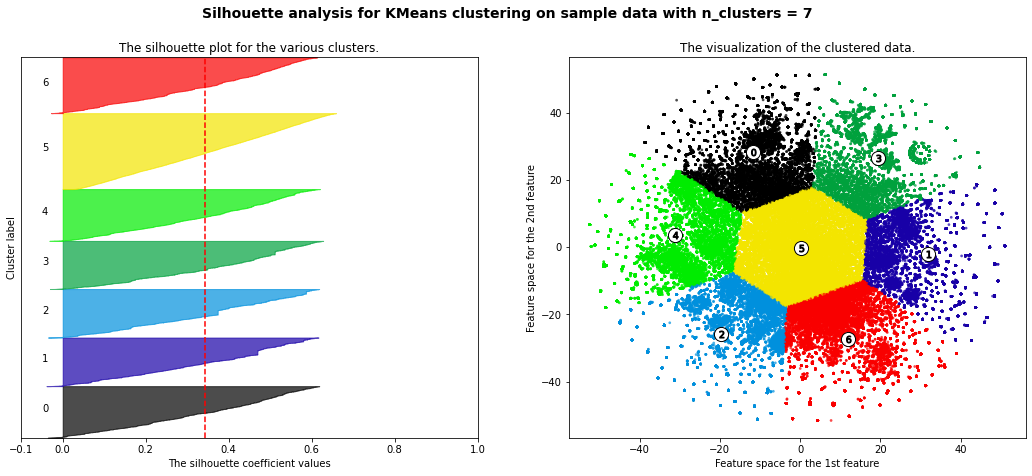

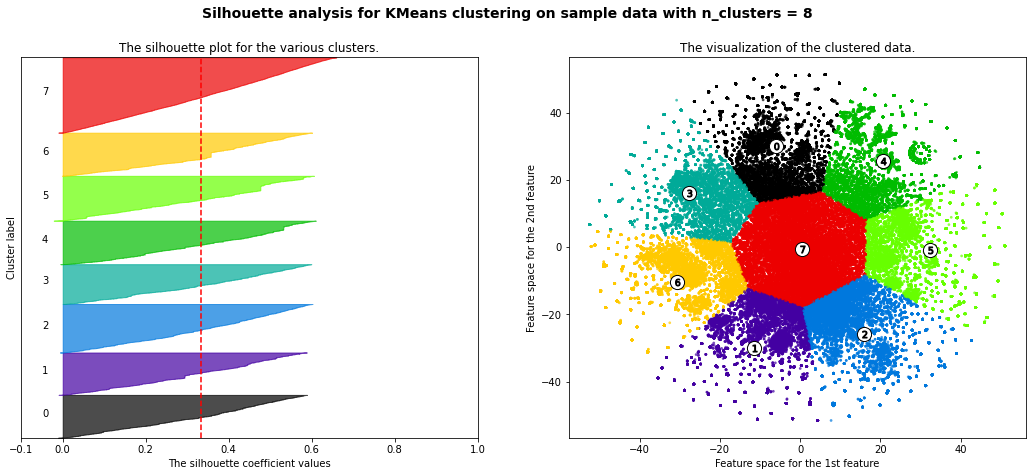

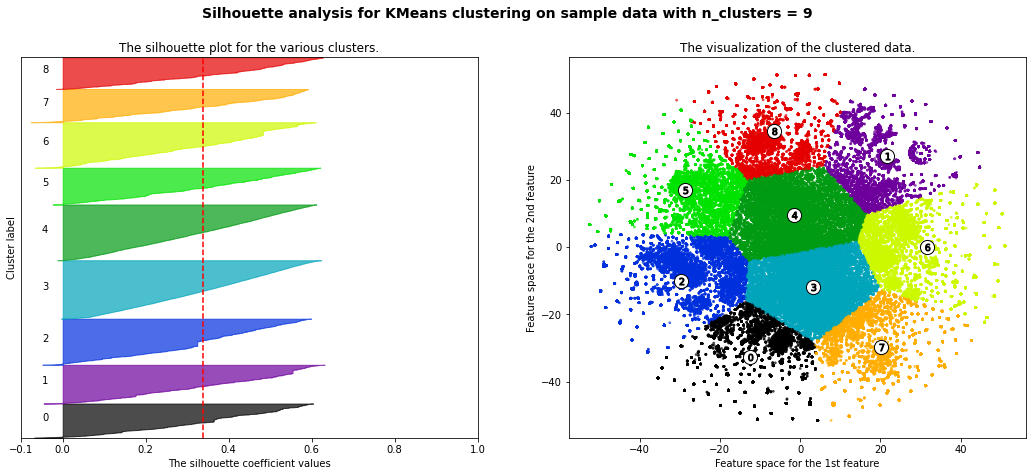

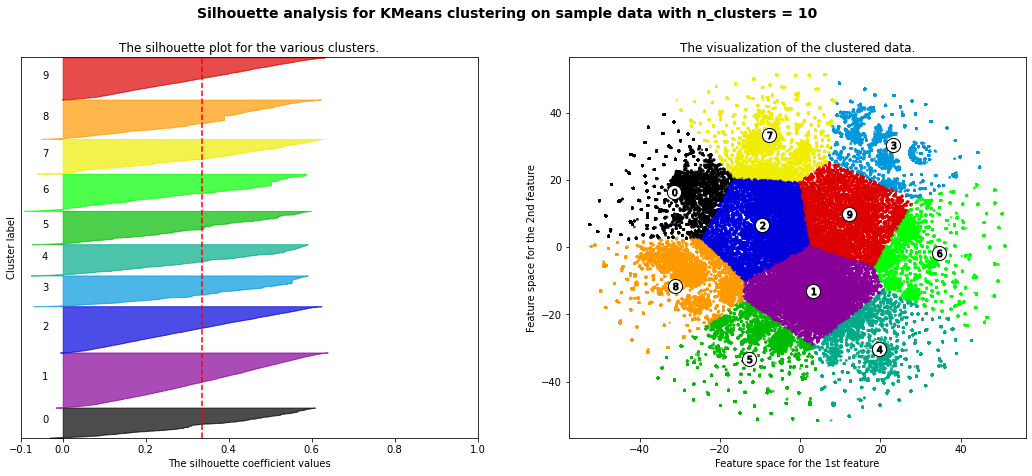

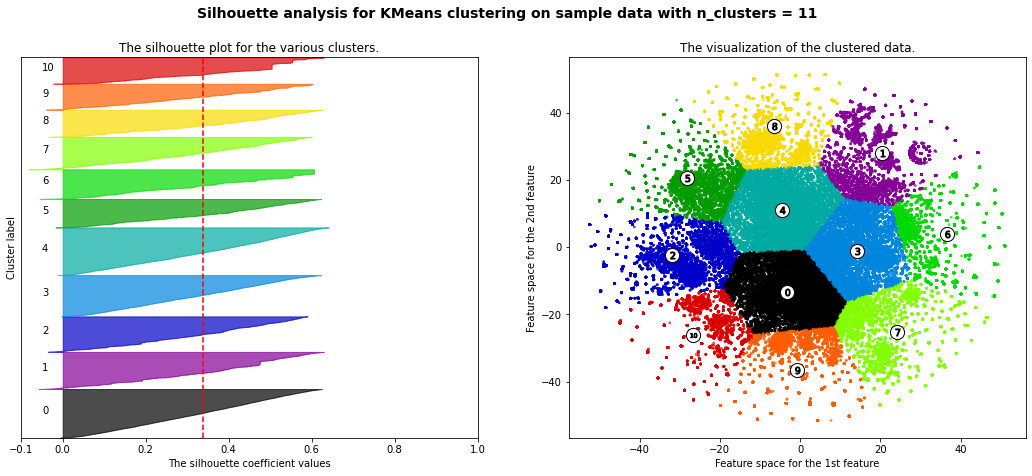

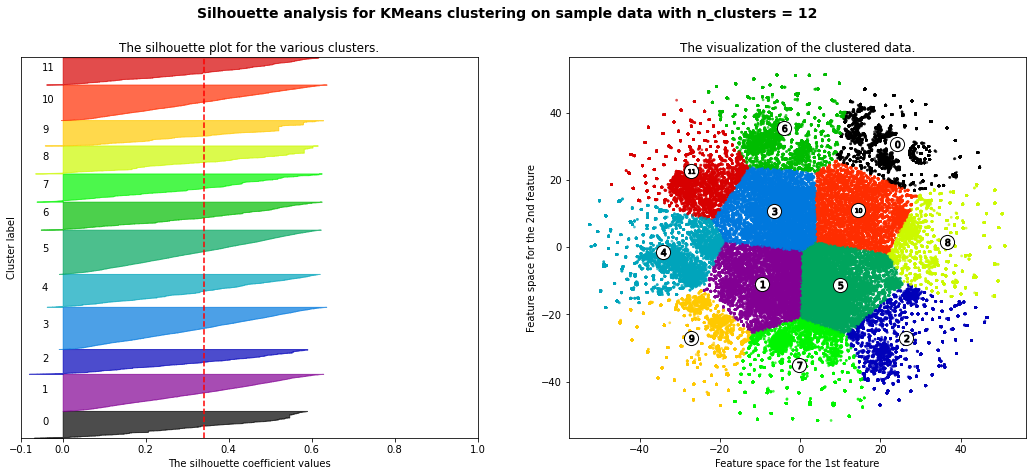

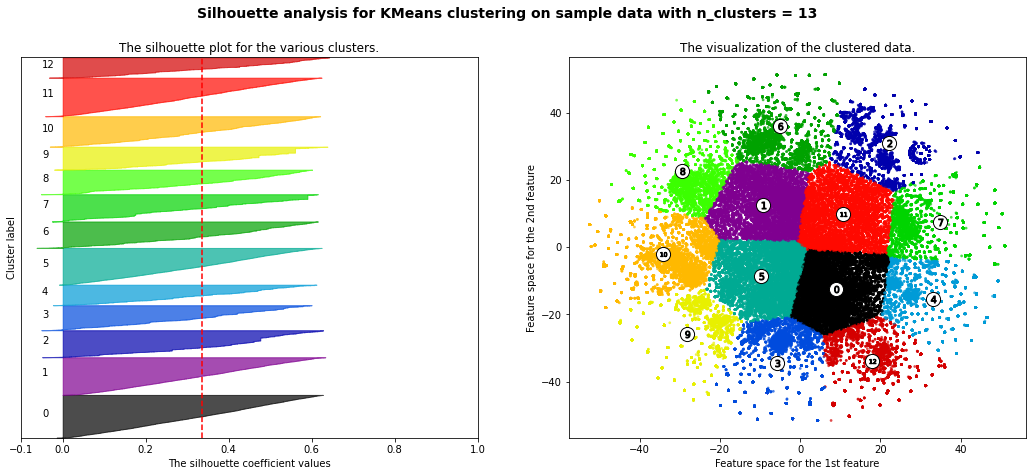

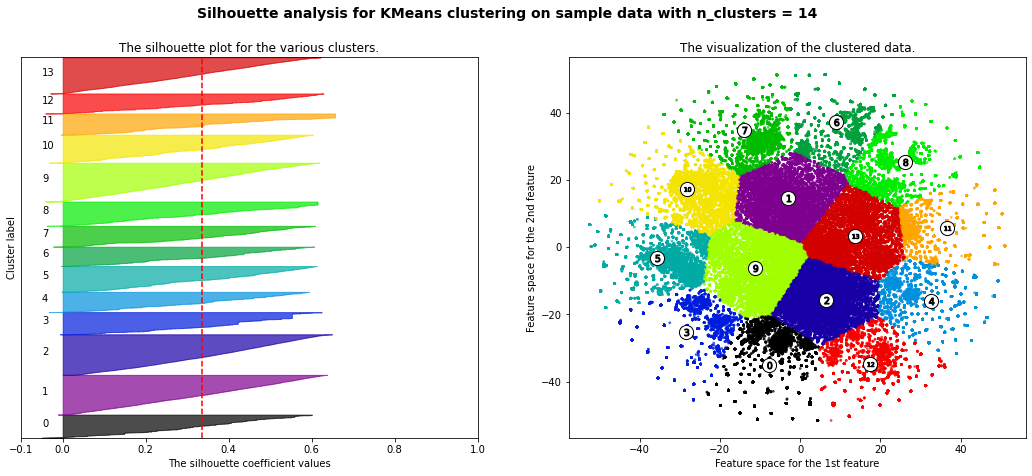

In [3]:
range_n_clusters = range(5, 15)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_tsne) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_tsne)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_tsne, cluster_labels)
    print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_tsne, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_tsne[:, 0], X_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

plt.show()

In [ ]:
# Data is very unniform so we will decide to use 15 clusters to have many clusters to divide the tweets.

# Clustering

In [4]:
clusterer = KMeans(n_clusters=15, random_state=10)
cluster_labels = clusterer.fit_predict(X_tsne)

In [5]:
df_tweets = pd.read_csv('tweets_cleaned.csv')
df_tweets = df_tweets.drop(columns = 'Unnamed: 0')
df_tweets.head()

,created_at,id,text,user,quote_count,reply_count,retweet_count,favorite_count,URL
0,Mon Nov 30 17:54:03 +0000 2020,1333469355435290624,@OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...,L🦄 PLT notice me,0,0,0,0,https://t.co/2fVluwbnIA
1,Mon Nov 30 17:54:03 +0000 2020,1333469355967995910,"N.J. reports 3,199 new COVID-19 cases, 15 more...",Maria Bonanno,0,0,0,0,https://t.co/1gNzZbl627
2,Mon Nov 30 17:54:03 +0000 2020,1333469356232159233,👏👏👏 good start to recognise all the work done ...,Christina Owen,0,0,0,0,https://t.co/u4sMu4fsIY
3,Mon Nov 30 17:54:03 +0000 2020,1333469356647444483,@FLOTUS @WhiteHouse Are those Red Covid crowns...,Pasodoble,0,0,0,0,NaN
4,Mon Nov 30 17:54:03 +0000 2020,1333469356647473162,@ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...,PATRIOTS 🆚 Globalists,0,0,0,0,https://t.co/tYCmnuwnSi


In [8]:
df_tweets['cluster'] = cluster_labels
df_tweets['tsne0'] =X_tsne[:, 0]
df_tweets['tsne1'] =X_tsne[:, 1]
df_tweets.head()

,created_at,id,text,user,quote_count,reply_count,retweet_count,favorite_count,URL,cluster,tsne0,tsne1
0,Mon Nov 30 17:54:03 +0000 2020,1333469355435290624,@OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...,L🦄 PLT notice me,0,0,0,0,https://t.co/2fVluwbnIA,13,21.775589,-43.076679
1,Mon Nov 30 17:54:03 +0000 2020,1333469355967995910,"N.J. reports 3,199 new COVID-19 cases, 15 more...",Maria Bonanno,0,0,0,0,https://t.co/1gNzZbl627,5,-30.722507,21.019814
2,Mon Nov 30 17:54:03 +0000 2020,1333469356232159233,👏👏👏 good start to recognise all the work done ...,Christina Owen,0,0,0,0,https://t.co/u4sMu4fsIY,9,5.079254,-16.341789
3,Mon Nov 30 17:54:03 +0000 2020,1333469356647444483,@FLOTUS @WhiteHouse Are those Red Covid crowns...,Pasodoble,0,0,0,0,NaN,2,11.471680,-3.852932
4,Mon Nov 30 17:54:03 +0000 2020,1333469356647473162,@ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...,PATRIOTS 🆚 Globalists,0,0,0,0,https://t.co/tYCmnuwnSi,7,27.790779,12.723544


In [12]:
import string
#Text preprocessing
stemming = PorterStemmer()
stops = set(stopwords.words("english"))
df_tweets['processed_text'] = pd.Series(dtype='object')
for index, row in df_tweets.iterrows():
    line = row['text']
    line=  line.lower()
    line = line.translate(str.maketrans('', '', string.punctuation))
    line=  line.split()
    line=[word for word in line if not word in stops]  
    line=[stemming.stem(word) for word in line] 
    df_tweets.at[index,'processed_text'] = line
df_tweets.head()

,created_at,id,text,user,quote_count,reply_count,retweet_count,favorite_count,URL,cluster,tsne0,tsne1,processed_text
0,Mon Nov 30 17:54:03 +0000 2020,1333469355435290624,@OfficialPLT https://t.co/3QeXmMdYeQ\nPlease c...,L🦄 PLT notice me,0,0,0,0,https://t.co/2fVluwbnIA,13,21.775589,-43.076679,"[officialplt, httpstco3qexmmdyeq, pleas, choos..."
1,Mon Nov 30 17:54:03 +0000 2020,1333469355967995910,"N.J. reports 3,199 new COVID-19 cases, 15 more...",Maria Bonanno,0,0,0,0,https://t.co/1gNzZbl627,5,-30.722507,21.019814,"[nj, report, 3199, new, covid19, case, 15, dea..."
2,Mon Nov 30 17:54:03 +0000 2020,1333469356232159233,👏👏👏 good start to recognise all the work done ...,Christina Owen,0,0,0,0,https://t.co/u4sMu4fsIY,9,5.079254,-16.341789,"[👏👏👏, good, start, recognis, work, done, throu..."
3,Mon Nov 30 17:54:03 +0000 2020,1333469356647444483,@FLOTUS @WhiteHouse Are those Red Covid crowns...,Pasodoble,0,0,0,0,NaN,2,11.471680,-3.852932,"[flotu, whitehous, red, covid, crown, see, dec..."
4,Mon Nov 30 17:54:03 +0000 2020,1333469356647473162,@ScottBaio @LAPDHQ @LADAOffice 🇺🇳United Nation...,PATRIOTS 🆚 Globalists,0,0,0,0,https://t.co/tYCmnuwnSi,7,27.790779,12.723544,"[scottbaio, lapdhq, ladaoffic, 🇺🇳unit, nation,..."


In [13]:
for i in range(15):
    bag_of_words = {}
    cluster_tweets = df_tweets[df_tweets['cluster'] == i]
    for tweet in cluster_tweets['processed_text']:
        for word in tweet:
            if word in bag_of_words.keys():
                bag_of_words[word] += 1
            else:
                bag_of_words[word] = 1
    most_frequent = [k for k, v in sorted(bag_of_words.items(), key=lambda item: item[1], reverse = True)][:5]
    print(most_frequent)

['covid', 'rt', 'peopl', 'pandem', 'die']
['rt', 'pandem', 'covid', 'covid19', 'amp']
['rt', 'covid', 'pandem', 'covid19', 'trump']
['rt', 'lewi', 'f1', 'hamilton', 'test']
['rt', 'vaccin', 'covid', 'covid19', 'death']
['rt', 'covid19', 'case', 'new', 'coronaviru']
['rt', 'test', 'hamilton', 'posit', 'lewi']
['rt', 'covid19', 'want', 'media', 'know']
['rt', 'covid', 'mask', 'work', 'pandem']
['covid', 'pandem', 'get', 'peopl', 'go']
['rt', 'covid', 'pandem', 'covid19', 'relief']
['rt', 'china', 'covid', 'coronaviru', 'cnn']
['rt', 'test', 'covid19', 'covid', 'neg']
['officialplt', 'pltpinkmonday', 'covid', 'would', 'work']
['covid19', 'pandem', 'rt', 'covid', 'coronaviru']


# Diversification

In [14]:
# Diversity score is the euclidean distance between the 2 tweets
def diversity_score(index_doc1, index_doc2, tweets):
    a = np.array((tweets.loc[index_doc1, 'tsne0'],tweets.loc[index_doc1,'tsne1']))
    b = np.array((tweets.loc[index_doc2, 'tsne0'],tweets.loc[index_doc2,'tsne1']))
    return np.linalg.norm(a-b)

In [15]:
diversity_score(0,1, df_tweets)

82.851746

In [16]:
index = pickle.load( open( "index.p", "rb" ) )
tf = pickle.load( open( "tf.p", "rb" ) )
idf = pickle.load(open( "idf.p", "rb" ) )
df =pickle.load( open( "df.p", "rb" ) )

In [17]:
def getTerms(line):
    """
    Preprocess the article text (title + body) removing stop words, stemming,
    transforming in lowercase and return the tokens of the text.
    
    Argument:
    line -- string (text) to be preprocessed
    
    Returns:
    line - a list of tokens corresponding to the input text after the preprocessing
    """
        
    stemming = PorterStemmer()
    stops = set(stopwords.words("english"))
    ## START CODE
    line=  line.lower() ## Transform in lowercase
    line=  line.split() ## Tokenize the text to get a list of terms
    line=[word for word in line if not word in stops]  ##eliminate the stopwords (HINT: use List Comprehension)
    line=[stemming.stem(word) for word in line] ## perform stemming (HINT: use List Comprehension)
    ## END CODE
    return line

In [18]:
def rankDocuments(terms, docs, index, idf, tf,tweets):
    """
    Perform the ranking of the results of a search based on the tf-idf weights
    
    Argument:
    terms -- list of query terms
    docs -- list of documents, to rank, matching the query
    index -- inverted index data structure
    idf -- inverted document frequencies
    tf -- term frequencies
    titleIndex -- mapping between page id and page title
    
    Returns:
    Print the list of ranked documents
    """
        
    # I'm interested only on the element of the docVector corresponding to the query terms 
    # The remaing elements would became 0 when multiplied to the queryVector
    docVectors=defaultdict(lambda: [0]*len(terms)) # I call docVectors[k] for a nonexistent key k, the key-value pair (k,[0]*len(terms)) will be automatically added to the dictionary
    queryVector=[0]*len(terms)    
    # compute the norm for the query tf
    query_terms_count = collections.Counter(terms) # get the frequency of each term in the query. 
    # Example: collections.Counter(["hello","hello","world"]) --> Counter({'hello': 2, 'world': 1})
    # HINT: use when computing tf for queryVector
    query_norm = la.norm(list(query_terms_count.values()))
    for termIndex, term in enumerate(terms): #termIndex is the index of the term in the query
        if term not in index:
            continue
        ## Compute tf*idf(normalize tf as done with documents)
        queryVector[termIndex]=query_terms_count[term]/query_norm * idf[term]
        
        # Generate docVectors for matching docs
        for docIndex, (doc, postings) in enumerate(index[term]):
            # Example of [docIndex, (doc, postings)]
            # 0 (26, array('I', [1, 4, 12, 15, 22, 28, 32, 43, 51, 68, 333, 337]))
            # 1 (33, array('I', [26, 33, 57, 71, 87, 104, 109]))
            # term is in doc 26 in positions 1,4, .....
            # term is in doc 33 in positions 26,33, .....
            #tf[term][0] will contain the tf of the term "term" in the doc 26
            if doc in docs:
                docVectors[doc][termIndex]=tf[term][docIndex] * idf[term]  # TODO: check if multiply for idf

    # calculate the score of each doc
    # compute the cosine similarity between queyVector and each docVector:
    # HINT: you can use the dot product because in case of normalized vectors it corresponds to the cosine siilarity
    # see np.dot
    
    docScores=[ [np.dot(curDocVec, queryVector), doc] for doc, curDocVec in docVectors.items() ]
    docScores.sort(reverse=True)
    resultDocs=[x[1] for x in docScores]
    #print document titles instead if document id's
    #resultDocs=[ titleIndex[x] for x in resultDocs ]
    if len(resultDocs) == 0:
        print("No results found, try again") 
    #print ('\n'.join(resultDocs), '\n')
    return resultDocs

In [19]:
def search_tf_idf(query, index, tweets):
    '''
    output is the list of documents that contain any of the query terms. 
    So, we will get the list of documents for each query term, and take the union of them.
    '''
    query=getTerms(query)
    docs=set()
    for term in query:
        try:
            # store in termDocs the ids of the docs that contain "term"                        
            termDocs=[posting[0] for posting in index[term]]
            # docs = docs Union termDocs
            docs = docs.union(termDocs)
        except:
            #term is not in index
            pass
    docs=list(docs)
    ranked_docs = rankDocuments(query, docs, index, idf, tf, tweets)
    return ranked_docs

In [22]:
# Used to rerank docs so we have the most relevant doc and then the docs from the top that are the most diverse
def diversify(ranked_docs, tweets):
    diversity_scores = {ranked_docs[0]: 100000000000}
    #Compute the diversity score for every doc
    for doc in ranked_docs:
        diversity_scores[doc] = diversity_score(ranked_docs[0],doc,tweets)
    diversity_scores = {k: v for k, v in sorted(diversity_scores.items(), key=lambda item: item[1], reverse = True)}
    return diversity_scores

In [24]:
queries = ['coronavirus test positive','covid19 pandemic','covid vaccine','people want vaccine','new vaccine coronavirus',
          'new cases coronavirus', 'covid death', 'covid china cases', 'coronavirus day cases','coronavirus hamilton']
top = 20
for query in queries:
    ranked_docs = search_tf_idf(query, index,df_tweets) 
    print("\n======================\nTop {} results out of {} for ({}):\n".format(top, len(ranked_docs),query))
    reranked_docs = diversify(ranked_docs[:top],df_tweets)
    for d_id in reranked_docs:
        print('-------------------------------------')
        print('Tweet: ' + df_tweets.loc[d_id,'text'])
        print('User: ' + df_tweets.loc[d_id,'user'])
        print('Date: ' +  df_tweets.loc[d_id,'created_at'])
        print('Likes: ' + str(df_tweets.loc[d_id,'favorite_count']))
        print('Retweets: ' + str(df_tweets.loc[d_id,'retweet_count']))
        if type(df_tweets.loc[d_id,'URL']) != str:
            print('No URL available')
        else:
            print('URL: ' + str(df_tweets.loc[d_id,'URL']))


Top 20 results out of 20443 for (coronavirus test positive):

-------------------------------------
Tweet: RT @spectatorindex: JUST IN: Lewis Hamilton tests positive for coronavirus
User: ΜούτζαχεντίνOS
Date: Tue Dec 01 09:25:56 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: RT @spectatorindex: JUST IN: Lewis Hamilton tests positive for coronavirus
User: #Blacklivesmatter #SayNoToRacism
Date: Tue Dec 01 09:27:02 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: RT @spectatorindex: JUST IN: Lewis Hamilton tests positive for coronavirus
User: Stuart Murless
Date: Tue Dec 01 09:28:19 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: @spectatorindex JUST IN: Anybody tests positive for coronavirus
User: Exotic Scouse ❁
Date: Tue Dec 01 08:08:18 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: Coronavirus tested p


Top 20 results out of 16126 for (people want vaccine):

-------------------------------------
Tweet: Who do you want as a replacement?
User: NatSKA
Date: Tue Dec 01 08:56:38 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: WHO  WANT  JERM
User: ꩜
Date: Mon Nov 30 18:08:26 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: I want to be russian.
User: Dustin Yates
Date: Mon Nov 30 18:16:25 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: I want this in my backyard!
User: WabiSabi1111
Date: Tue Dec 01 08:40:08 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: I want to know, too.
User: KYMDYLWYTHIT
Date: Mon Nov 30 18:18:07 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: “I don’t want the vaccine i don’t want it.” That’s good that means it would be available to the peo


Top 20 results out of 18623 for (new cases coronavirus):

-------------------------------------
Tweet: Iowa sees more than 2,000 new coronavirus cases in 1 day https://t.co/fyUQYYoDfI
User: Pehal News
Date: Mon Nov 30 18:20:12 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/fyUQYYoDfI
-------------------------------------
Tweet: Coronavirus in Quebec: 1,333 new cases, 23 more deaths https://t.co/Syrs7cubcP
User: Breaking News Tv
Date: Mon Nov 30 18:19:00 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/Syrs7cubcP
-------------------------------------
Tweet: Coronavirus: One death, 182 new cases https://t.co/IlKs6ZrzXA
User: Cyprus Mail
Date: Mon Nov 30 17:56:44 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/IlKs6ZrzXA
-------------------------------------
Tweet: Coronavirus: Nigeria records 145 new cases, zero death https://t.co/J1Y9MzYWLQ
User: The Street Journal
Date: Tue Dec 01 08:57:45 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/J1Y9MzYWLQ
-----------------------------


Top 20 results out of 36412 for (covid china cases):

-------------------------------------
Tweet: China: 12 new COVID-19 cases, no deaths
https://t.co/s4Tz9XN7O8
#KUNA
User: Kuwait News Agency - English Feed
Date: Tue Dec 01 09:04:37 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: WHO/UN continuing to plead China's case over the coronavirus https://t.co/0IynL0Xj5U
User: Kyle Orton
Date: Tue Dec 01 08:48:17 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/0IynL0Xj5U
-------------------------------------
Tweet: China covered up thousands of confirmed daily COVID cases in February https://t.co/WlbHJqxRfl via https://t.co/U8TWFPUdu3
User: Kimberly (K.K.W.)
Date: Tue Dec 01 09:15:30 +0000 2020
Likes: 0
Retweets: 0
URL: https://t.co/U8TWFPUdu3
-------------------------------------
Tweet: China covered up thousands of confirmed daily COVID cases in February
 https://t.co/4ZCeXYlyFq
User: JoanHathaway
Date: Tue Dec 01 09:07:55 +0000 2020
Likes: 


Top 20 results out of 13751 for (coronavirus hamilton):

-------------------------------------
Tweet: Lewis Hamilton Tests positive for coronavirus
User: BRAVIN YURI
Date: Tue Dec 01 08:20:19 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: https://t.co/0xCrxb48Qq
Lewis Hamilton has tested positive for coronavirus
User: The Buckshee
Date: Tue Dec 01 08:15:10 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: Lewis Hamilton tests positive for coronavirus
User: Mazi Urch_mann
Date: Tue Dec 01 08:41:35 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: Lewis Hamilton tests positive for coronavirus.
User: Vishal 🕉
Date: Tue Dec 01 08:38:17 +0000 2020
Likes: 0
Retweets: 0
No URL available
-------------------------------------
Tweet: Lewis Hamilton Tests Positive for Coronavirus https://t.co/X7PIb7GKD0
User: Ozisa 96.1 FM
Date: Tue Dec 01 09:17:48 +0000 2020
Lik